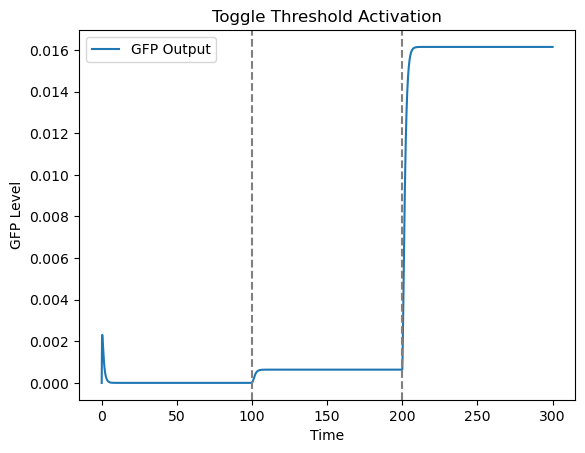

In [4]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np

model = te.loada("""
model toggle_threshold
            
// Species 
IPTG = 0
LacI = 10
TetR = 0
GFP = 0
                
// Parameters
k_lacI = 50
k_tetR = 50
k_GFP = 5
K_lacI = 5
K_tetR = 5
n = 4
d = 1
                 
// Reactions
J0: -> TetR; k_tetR/(1+(LacI/(K_lacI+IPTG))^n)
J1: -> LacI; k_lacI/(1+(TetR/K_tetR)^n)
J2: -> GFP; k_GFP*TetR/(1+(LacI/(K_lacI+IPTG))^n)
                 
// Degradation
J4: LacI -> ; d*LacI
J5: TetR -> ; d*TetR
J6: GFP -> ; d*GFP
end
""")

model.reset()
model.IPTG = 0
r1 = model.simulate(0, 100, 1000)

model.reset()
model.LacI = r1[-1][1]
model.TetR = r1[-1][2]
model.GFP = r1[-1][3]
model.IPTG = 5
r2 = model.simulate(0, 100, 1000)

model.reset()
model.LacI = r2[-1][1]
model.TetR = r2[-1][2]
model.GFP = r2[-1][3]
model.IPTG = 10
r3 = model.simulate(0, 100, 1000
                    )
r_combined = np.vstack((
    np.column_stack((r1[:,0], r1[:,3])),
    np.column_stack((r2[:,0]+100, r2[:,3])),
    np.column_stack((r3[:,0]+200, r3[:,3]))
))

plt.plot(r_combined[:,0], r_combined[:,1], label = "GFP Output")
plt.axvline(100, color='gray', linestyle='--')
plt.axvline(200, color='gray', linestyle='--')
plt.xlabel("Time")
plt.ylabel("GFP Level")
plt.title("Toggle Threshold Activation")
plt.legend()
plt.show()